### 데이터 준비하기 - **exchange.csv**

In [602]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
from encodings import euc_kr
import seaborn as sns

exchange = pd.read_csv('./exchange_train.csv',encoding = 'utf_8')
kospi = pd.read_csv('./kospi_train.csv',encoding = 'utf_8')
kospi_date = kospi[['날짜']]

exchange = exchange.merge(kospi_date,how = 'inner',on = '날짜')

In [298]:
# 시각화를 위한 준비

import matplotlib.pylab as plb
plb.rcParams["figure.figsize"] = (15,5)
plb.rcParams['lines.linewidth'] = 2
plb.rcParams['lines.color'] = 'r'
plb.rcParams['axes.grid'] = True 

# 이상치 처리하기

## exchange

#### USD

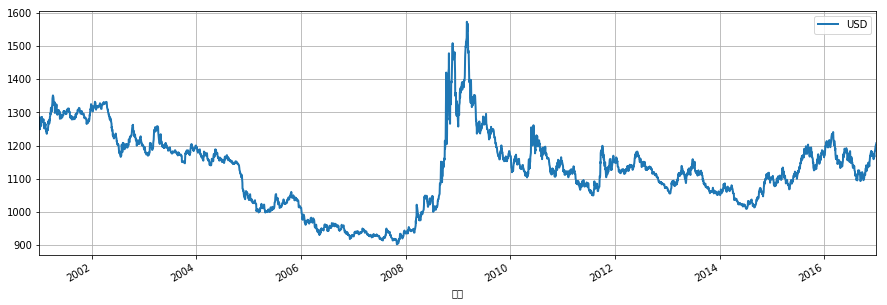

In [337]:
# 원본 데이터 분포 확인
exchange[['날짜','USD']].plot(x='날짜')

> 이상치로 보이는 값 없음

#### EUR

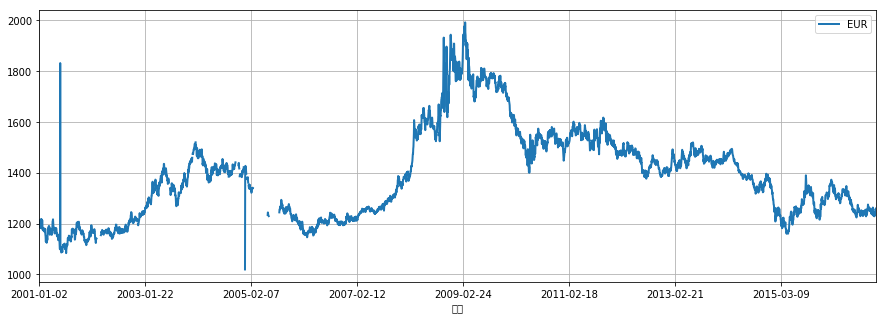

In [311]:
# 원본 데이터 분포 확인
exchange[['날짜','EUR']].plot(x='날짜')

> 결측치가 다수 존재하는 것으로 보이며 이상치가 존재하는 것으로 보임

In [603]:
# (1) 2001년 ~ 2002년 사이 이상치
exchange[exchange['EUR']>1800].head(5) # 98 2001-05-28 # 실제값 1107.53  # 출처: 한국은행경제통계시스템

# 바꾸기
exchange.iloc[98,2]=1107.53
exchange.iloc[98,2]

1107.53

In [604]:
# (2) 2004년 ~ 2006년 사이 이상치
exchange[exchange['EUR']<1100].tail(5) # 970 2004-12-24  # 실제값 1419.43  # 출처: 한국은행경제통계시스템

# 바꾸기
exchange.iloc[970,2]=1419.43
exchange.iloc[970,2]

1419.43

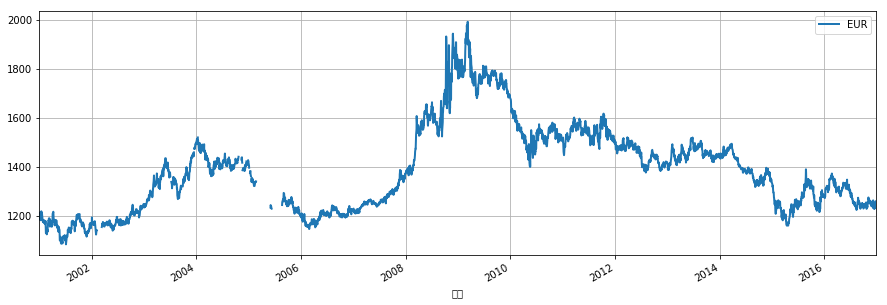

In [270]:
# 수정 후 데이터 분포 확인
exchange[['날짜','EUR']].plot(x='날짜')

#### CNY

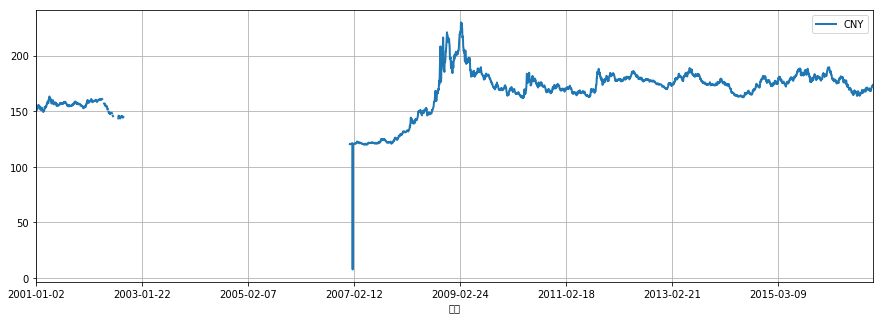

In [303]:
# 원본 데이터 분포 확인
exchange[['날짜','CNY']].plot(x='날짜')

> 일정 구간이 결측치 값으로 데이터가 존재하지 않으며, 2007년 부근에 이상치가 존재하는 것으로 보임

In [605]:
# (1) 2006년 ~ 2008년 사이 이상치
exchange[exchange['CNY']<100].head() # 1494 2007-02-02 # 실제값 120.87

# 바꾸기
exchange.iloc[1494,3]=120.87
exchange.iloc[1494,3]

120.87

In [606]:
# (2) 2002년 이상치
exchange[exchange['CNY']<100] # 360 2002-06-25 # 실제값 없음

# 결측치 처리
exchange.iloc[360,3]=np.nan
exchange.iloc[360,3]

nan

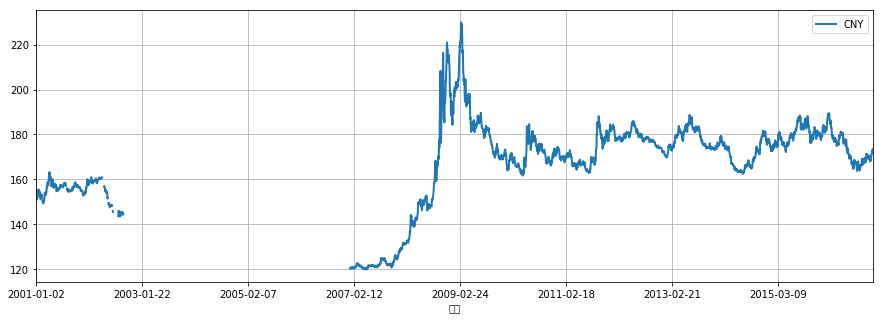

In [348]:
# 수정 후 데이터 분포 확인
exchange[['날짜','CNY']].plot(x='날짜')

#### JPY

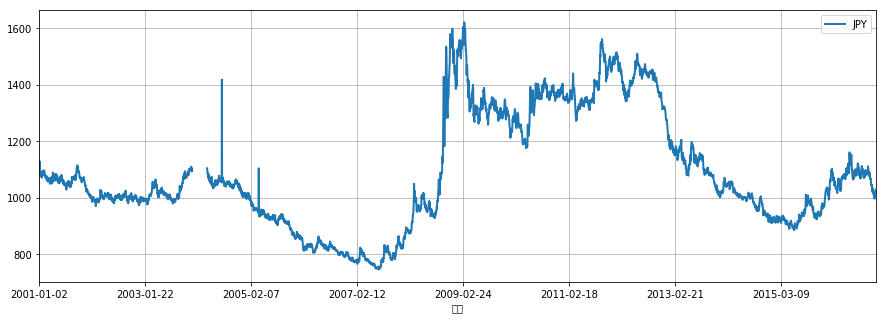

In [316]:
# 원본 데이터 분포 확인
exchange[['날짜','JPY']].plot(x='날짜')

> 결측치가 존재하는 것으로 보이며 2005년 근처에 이상치가 존재하는 것으로 보임

In [607]:
# (1) 2003년 ~ 2005년 사이 이상치
exchange[exchange['JPY']>1400].head() # 861 2004-07-14  #실제값 1059.97

# 바꾸기
exchange.iloc[861,4]=1059.97
exchange.iloc[861,4]

1059.97

In [608]:
# (2) 2005년 이상치
exchange[exchange['JPY']>1100] # 1035 2005-03-01 #실제값 949.56

# 바꾸기
exchange.iloc[1035,4]=949.56
exchange.iloc[1035,4]

949.56

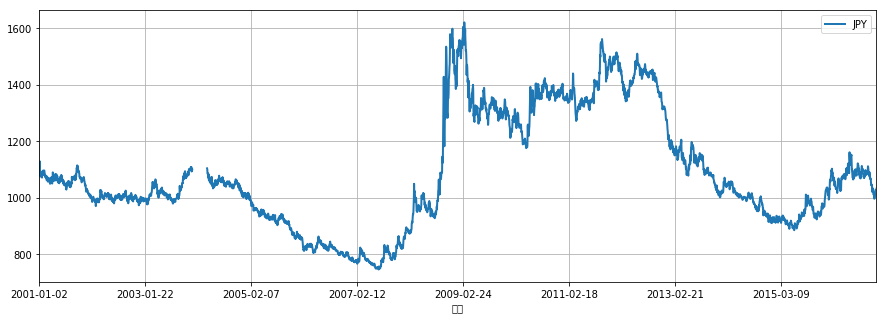

In [320]:
# 수정 후 데이터 분포 확인
exchange[['날짜','JPY']].plot(x='날짜')

#### GBP

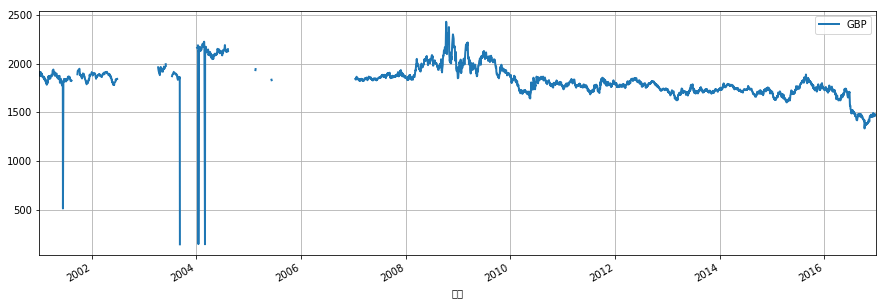

In [272]:
# 원본 데이터 분포 확인
exchange[['날짜','GBP']].plot(x='날짜')

> 결측치와 이상치가 다수 존재하는 것으로 보임

In [609]:
# 2001년 ~ 2005년 사이 이상치
exchange[exchange['GBP']<1000]

# 111 2001-06-15 # 1809.03
# 656 2003-09-09 # 1857.66
# 741 2004-01-16 # 2166.11
# 769 2004-03-02 # 2199.64

,날짜,USD,EUR,CNY,JPY,GBP
111,2001-06-15,1291.7,1114.61,156.05,1064.09,517.33
656,2003-09-09,1172.8,1298.11,NaN,1005.62,150.37
741,2004-01-16,1187.4,1495.59,NaN,NaN,152.95
769,2004-03-02,1176.5,1465.62,NaN,NaN,151.15


In [610]:
# 바꾸기
exchange.iloc[111,5] = 1809.03
exchange.iloc[656,5] = 1857.66
exchange.iloc[741,5] = 2166.11
exchange.iloc[769,5] = 2199.64

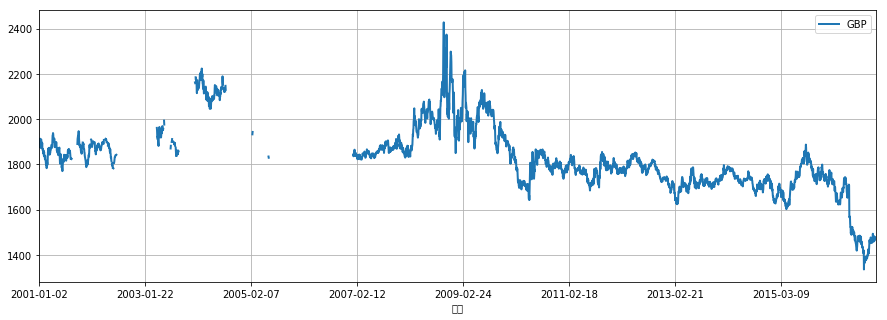

In [322]:
# 수정 후 데이터 분포 확인
exchange[['날짜','GBP']].plot(x='날짜')

# 결측치 처리하기 _ (market , per , economic, exchange)

- 결측치 = NaN
- 특정 구간이 통째로 결측치 
- USD를 제외한 모든 변수에 결측치가 존재

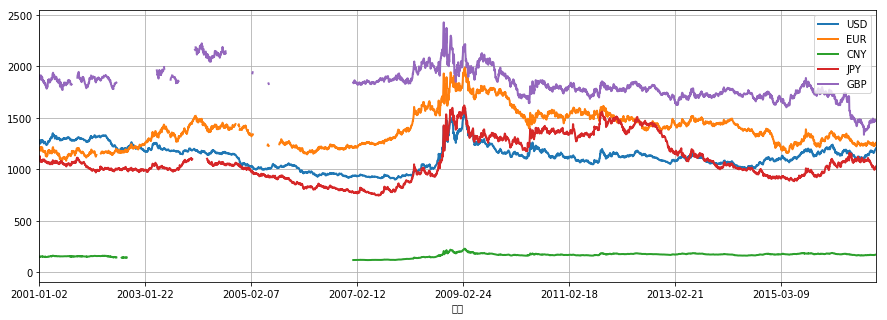

In [323]:
%matplotlib inline
import matplotlib.pylab as plb
plb.rcParams["figure.figsize"] = (15,5)
plb.rcParams['lines.linewidth'] = 2
plb.rcParams['lines.color'] = 'r'
plb.rcParams['axes.grid'] = True 

exchange.plot(x='날짜')

- 결측치의 분포가 데이터 상에 구간화되어있는 것을 확인할 수 있다.
- 단순하게 i-1번째와 i+1번째의 평균으로 결측치 처리를 할 수 없다.

#### 결측치 처리 방법 후보
1. 버린다
2. 전체 평균으로 채운다
3. 구간의 앞뒤 평균으로 채운다

**특정 구간의 결측치를 예측하는 방향으로 간다 => 시계열 예측**

## 시계열 예측 할 수 있을까? fear.ML
### ARIMA

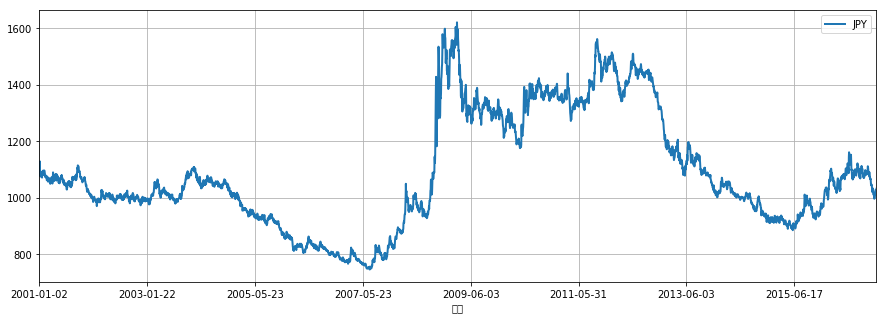

In [353]:
## jpy 데이터 준비
data_jpy = exchange[exchange['JPY'].isnull()==False]
data_jpy = data_jpy[['날짜','JPY']]
data_jpy
data_jpy.plot(x='날짜')

C:\Users\genie\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


KeyboardInterrupt: 

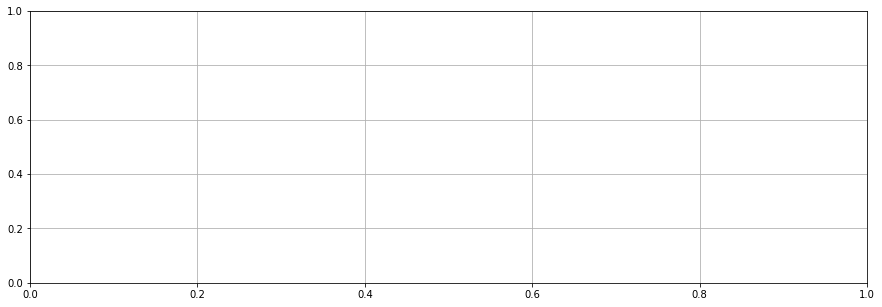

In [379]:
# 자기공선성 확인
from statsmodels.graphics.tsaplots import plot_acf

#plot_acf(data_jpy.iloc[:,1])
plot_pacf(data_jpy.iloc[:,1])
plt.show()

- tag 600정도에서 자기상관이 양에서 음으로 변한다 -> 따라서 p=0
- 1차 차분 후에 다시 확인한다
[참고](https://byeongkijeong.github.io/ARIMA-with-Python/)

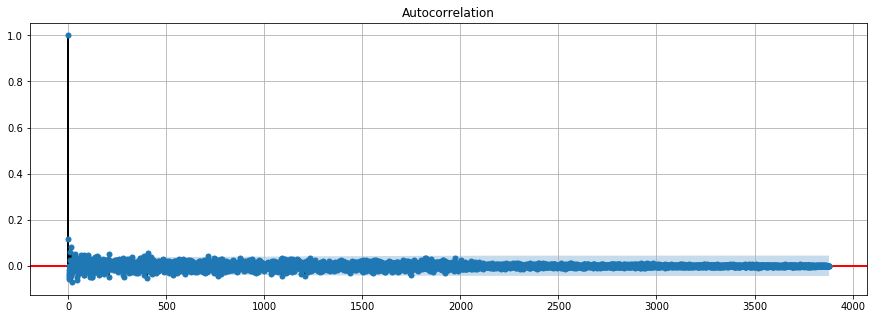

In [378]:
diff_1=data_jpy.iloc[:,1].diff(periods=1).iloc[1:]
#diff_1.plot()
plot_acf(diff_1)
plt.show()

> autocollinearity를 띄던 분포가 non-autocollinearity를 띄는 것으로 변환됨 -> 차분 d = 1 이 적절하다

In [355]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(data_jpy.iloc[:,1], order=(0,1,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.JPY   No. Observations:                 3881
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -14816.429
Method:                       css-mle   S.D. of innovations             11.009
Date:                Sat, 02 Nov 2019   AIC                          29638.858
Time:                        16:56:21   BIC                          29657.649
Sample:                             1   HQIC                         29645.529
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0170      0.199     -0.085      0.932      -0.408       0.374
ma.L1.D.JPY     0.1286      0.016      7.840      0.000       0.096       0.161
                                    Roots       

C:\Users\genie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\genie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [356]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(data_jpy.iloc[:,1], order=(0,1,1))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.JPY   No. Observations:                 3881
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -14816.433
Method:                       css-mle   S.D. of innovations             11.009
Date:                Sat, 02 Nov 2019   AIC                          29636.865
Time:                        16:56:27   BIC                          29649.393
Sample:                             1   HQIC                         29641.313
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ma.L1.D.JPY     0.1286      0.016      7.840      0.000       0.096       0.161
                                    Roots                                    
                  Real          Imaginary         

C:\Users\genie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\genie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


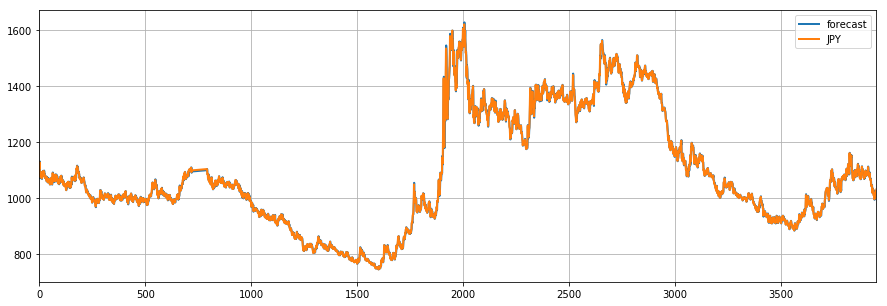

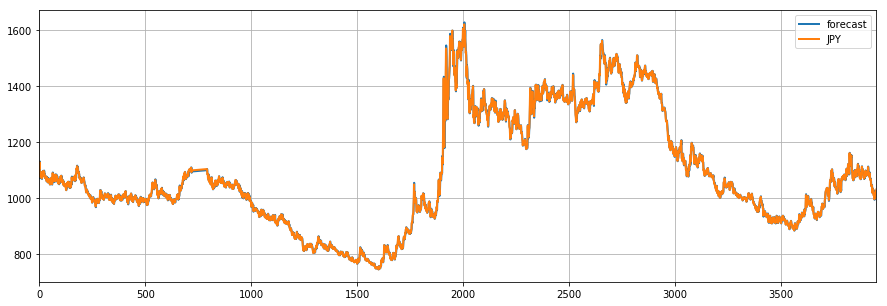

In [287]:
model_fit.plot_predict()

In [288]:
fore = model_fit.forecast(steps=1)
fore=float(fore[0])
fore = round(fore,2)
fore

1032.38

## ARIMA로 결측치 예측하는 모듈 만들기

> nan을 포함하지 않은 전체 모형의 추이가 (0,1,1) parameter에 적절하다고 판단하여 파라미터를 다음과 같이 설정. 자동화 모듈을 만든다

1. 데이터를 받는다.(날짜와 quantity변수가 포함된 n*2 dataframe형식)
2. 데이터의 Nan를 찾고 NaN가 나타날 때마다 데이터를 자른다
3. 잘라낸 데이터(nan이 없는 데이터)로 ARIMA 모델을 학습시킨 후 예측값을 출력한다.
4. 예측값을 빈 리스트에 저장한다
5. 더이상 nan이 나타나지 않고 data의 length까지 도달할 경우 반복을 멈춘다
6. 결과 리스트를 NaN 위치에 대체하고 new data를 저장한다
7. new data를 반환한다

In [211]:
def fill_na_ARIMA(x):
    # 1. 데이터 받기 - col하나만 가지고 있는 데이터 ex)exchange['JPY'] - pd.Series형식
    # 2. NaN 찾아내기
    i = 0
    while x.iloc[:,1].isnull().sum() > 0:
        if x.iloc[:,1].isnull()[i]==True:
            # 3. nan발견하면 데이터 자르기
            train = x.iloc[:,1]
            train = train[:i]
            # 
            model = ARIMA(train, order=(0,1,1))
            model_fit = model.fit(trend='nc',full_output=True, disp=1)
            fore = model_fit.forecast(steps=1)
            pred = float(fore[0])
            pred = round(pred,2)
            x.iloc[i,1] = pred
            i = 0
            continue
        else:
            i += 1    
    return x

In [277]:
new_EUR = fill_na_ARIMA(exchange[['날짜','EUR']])

C:\Users\genie\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [278]:
new_EUR.isnull().sum()

날짜     0
EUR    0
dtype: int64

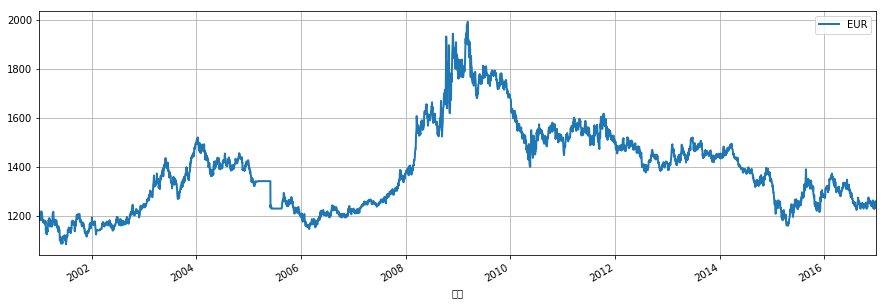

In [279]:
new_EUR.plot(x='날짜')

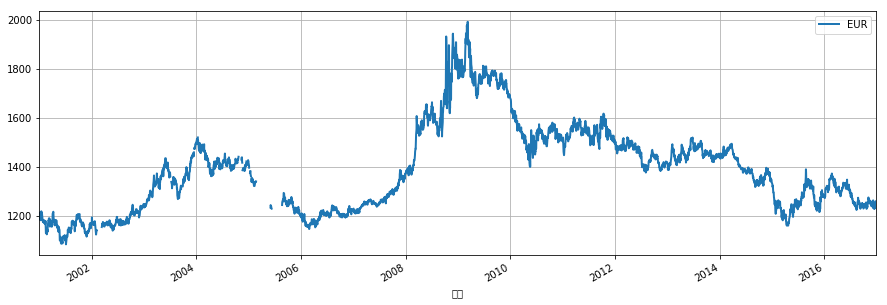

In [280]:
# 원본 데이터
exchange[['날짜','EUR']].plot(x = '날짜')

## 결측치 처리 후 파일 내보내기

### 결측치 처리

In [357]:
## CNY
new_CNY = fill_na_ARIMA(exchange[['날짜','CNY']])

C:\Users\genie\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\genie\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\genie\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\genie\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\genie\

In [358]:
new_CNY.isnull().sum()

날짜     0
CNY    0
dtype: int64

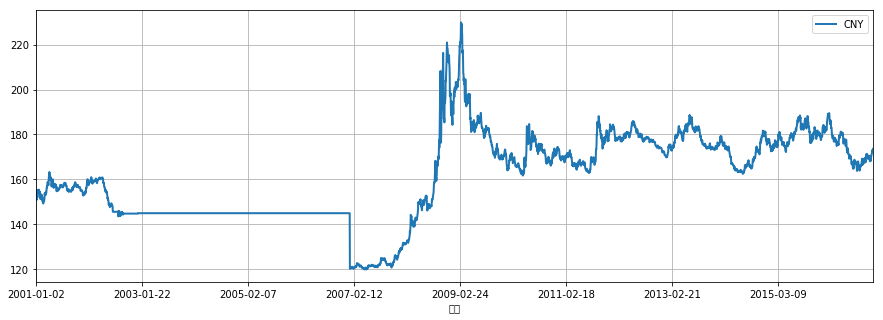

In [359]:
new_CNY.plot(x='날짜')

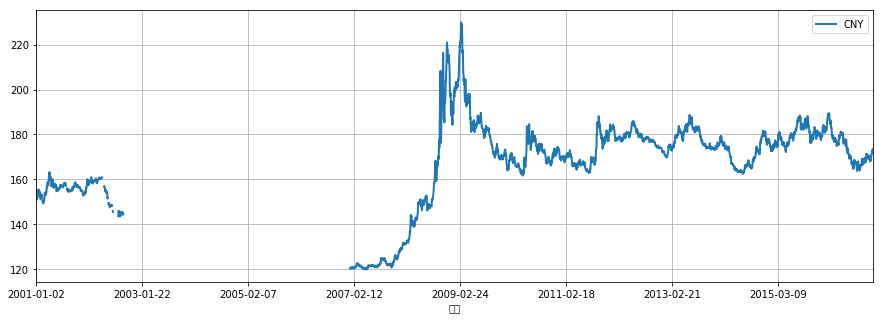

In [360]:
# 원본 데이터
exchange[['날짜','CNY']].plot(x = '날짜')

In [329]:
## JPY
new_JPY = fill_na_ARIMA(exchange[['날짜','JPY']])

In [330]:
new_JPY.isnull().sum()

날짜     0
JPY    0
dtype: int64

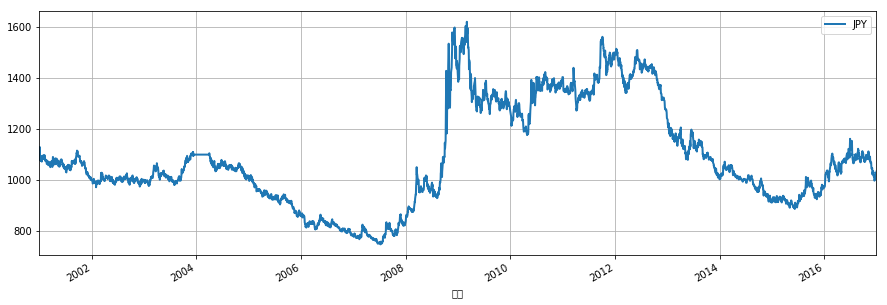

In [331]:
new_JPY.plot(x='날짜')

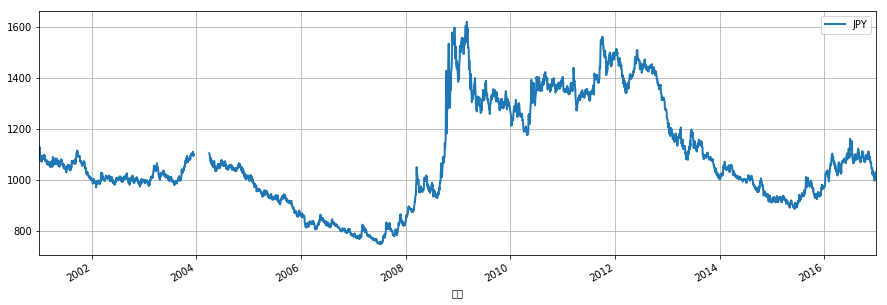

In [332]:
# 원본 데이터
exchange[['날짜','JPY']].plot(x = '날짜')

In [333]:
## GBP
new_GBP = fill_na_ARIMA(exchange[['날짜','GBP']])

In [334]:
new_GBP.isnull().sum()

날짜     0
GBP    0
dtype: int64

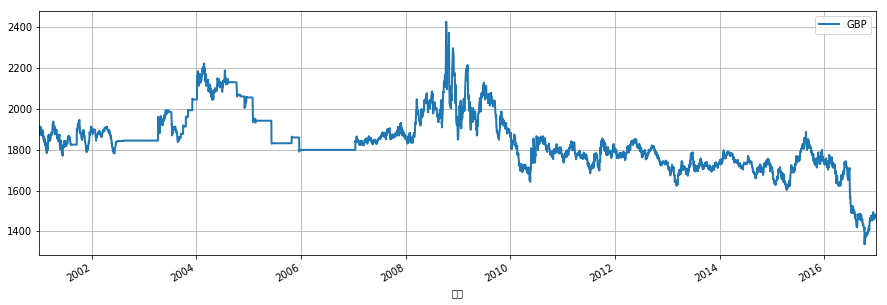

In [335]:
new_GBP.plot(x='날짜')

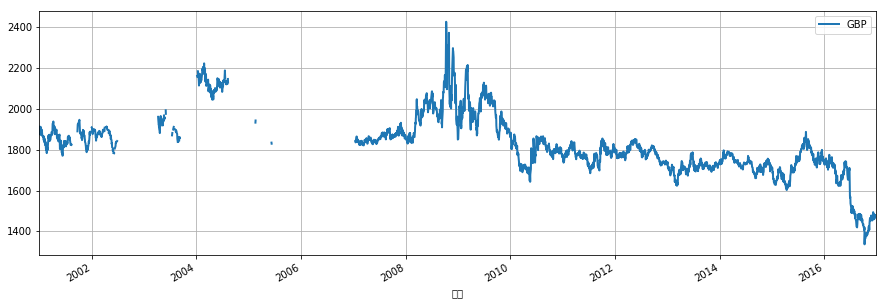

In [336]:
# 원본 데이터
exchange[['날짜','GBP']].plot(x = '날짜')

## VAR 모델 적용

- VAR
    - 다변량 시계열 모델

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016D8BD2FCC0>,
      dtype=object)

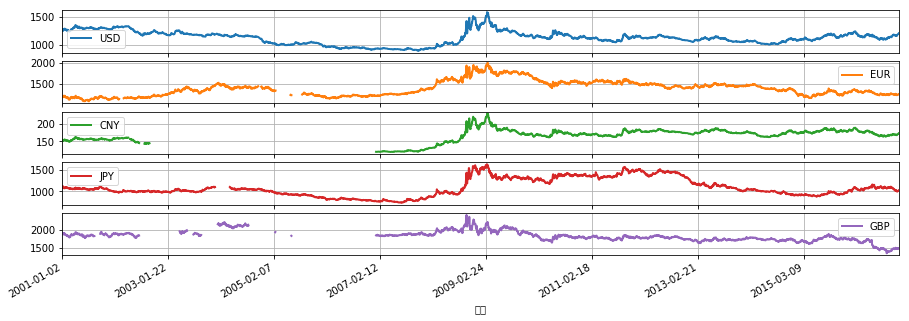

In [361]:
# 전체 데이터셋의 분포를 확인
exchange.plot(x= '날짜',subplots= True)

#### dropna로 결측값을 포함하지 않는 데이터만 가지고 VAR 분석

In [783]:
from statsmodels.tsa.vector_ar.var_model import VAR

# na가 없는 데이터
exchange_no_na = exchange.dropna()

# 날짜가 없는 데이터
exchange_var = np.asarray(exchange_no_na.drop('날짜',axis = 1))

# VAR 분석
mvar = sm.tsa.VAR(exchange_var)
resvar = mvar.fit()
print(resvar.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 03, Nov, 2019
Time:                     14:52:51
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    16.1433
Nobs:                     2742.00    HQIC:                   16.1020
Log likelihood:          -41467.4    FPE:                9.61240e+06
AIC:                      16.0786    Det(Omega_mle):     9.50792e+06
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         6.559053         3.337514            1.965           0.049
L1.y1         0.995278         0.003296          301.925           0.000
L1.y2        -0.000785         0.002303           -0.341           0.733
L1.y3         0.010034

##### 변수 USD(y1) EUR(y2) CNY(y3) JPY(y4) GBP(y5) 에 대한 VAR 분석 결과

- EUR(y2)에 유의한 변수: 없음 - 상관계수 : y5
- CNY(y3)에 유의한 변수: 

## VAR로 결측치 예측하는 모듈 만들기

> 변수간의 상관관계를 분석한 결과, exchange안의 모든 변수들이 서로 상관관계를 가지고 있다고 판단. -> VAR로 변수간의 상관관계를 포함한 시계열 예측을 시행한다

In [670]:
def fill_na_VAR(x): 
    # 1. 모든 변수를 포함한 데이터 
    ### 1-1. 날짜를 제외한 데이터를 만든다
    data = x.drop('날짜', axis = 1) ## type:DataFrame
    ### 1-2. 필요한 변수 설정하기
    total_na = data.isnull().sum().sum() # 데이터 전체 na개수 총합 ## type:int
    n_row = data.shape[0] # 데이터 row 개수 ## type:int
    n_col = data.shape[1] # 데이터 col 개수 ## type:int
    
    # 2. NaN 찾아내기
    while total_na > 0: # na가 존재한다는 전제 하에
        for i in range(n_row): # row를 기준으로 for loop
            irow_na = data.iloc[i,:].isnull().sum() # i번째 행의 na개수 총합 ## type:int
            #print(irow_na)
            
            if irow_na != 0: # i번째 행에 na가 존재하면
                # 3. nan발견하면 데이터 자르기
                train = data.iloc[:i,:] # type:DataFrame
                #print(train)
                train_ar = np.asarray(train) # type:np.array (i-1*n_col)
                #print(train_ar)

                # 4. VAR 분석 -> 함수로 만들기
                var = sm.tsa.VAR(train_ar)
                resvar = var.fit()
                pred = resvar.forecast(resvar.y, 1) # type:np.array (1*n_col)
                #print(pred)
                for j in range(n_col): # col 기준으로
                    if data.iloc[i,:].isnull()[j]: # numeric변수만 담긴 데이터의 i*j위치의 값이 na이면 ## type:bool
                        #print((i,j))
                        # 5. 필요한 예측값만 뽑아오기
                        ans = pred[0,j] # pred의 j번째 값 가져오기 ## type:float64
                        ans = round(ans,2) # type:float64
                        #print(ans)
                        # 6. 해당 위치에 대체하기
                        data.iloc[i,j] = np.nan_to_num(ans) # type:float64
                        #print(data.iloc[i,j])
                continue
        break
    
    final = pd.concat([x['날짜'],data], axis = 1) 
    final['날짜'] = pd.to_datetime(final['날짜'], format="%Y/%m/%d") # 날짜 format 변경 object->datetime
    
    return final ## type:DataFrame

In [634]:
sample = exchange.iloc[:35,:]
#sample.iloc[15,3]
#sample.iloc[i,:].isnull()[j]
sample.iloc[15,:].isnull()[3]

True

In [636]:
fill_na_VAR(sample)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
       USD      EUR     CNY      JPY      GBP
0   1259.7  1185.38  152.19  1099.07  1885.02
1   1267.8  1205.49  153.15  1108.07  1903.35
2   1285.4  1193.24  155.29  1128.53  1914.15
3   1249.3  1190.90  150.92  1078.01  1876.82
4   1267.8  1215.06  153.16  1088.71  1906.33
5   1264.6  1196.69  152.77  1088.67  1892.98
6   1257.9  1187.39  151.97  1074.67  1873.01
7   1261.6  1181.93  152.42  1083.57  1876.19
8   1276.6  1214.30  154.24  1082.41  1911.20
9   1281.2  1218.23  154.79  1078.50  1895.09
10  1285.9  1212.15  155.37  1079.91  1898.37
11  1284.4  1210.48  155.18  1091.06  1891.21
12  1277.2  1194.76  154.32  1071.25  1881.44
13  1286.5  1213.11  155.44  1090.44  1895.01
14  1276.7  1193.91  154.26  1094.05  1869.09
[[1259.7  1185.38  152.19 1099.07 1885.02]
 [1267.8  1205.49  153.15 1108.07 1903.35]
 [1285.4  1193.24  155.29 1128.53 1914.15]
 [1249.3  1190.9   150.92 1078.01 1876.82]
 [1267.8  1215.06  153.16 1088.71 1906.33]
 [1264.6  1196.69

,USD,EUR,CNY,JPY,GBP
0,1259.7,1185.38,152.19,1099.07,1885.02
1,1267.8,1205.49,153.15,1108.07,1903.35
2,1285.4,1193.24,155.29,1128.53,1914.15
3,1249.3,1190.90,150.92,1078.01,1876.82
4,1267.8,1215.06,153.16,1088.71,1906.33
5,1264.6,1196.69,152.77,1088.67,1892.98
6,1257.9,1187.39,151.97,1074.67,1873.01
7,1261.6,1181.93,152.42,1083.57,1876.19
8,1276.6,1214.30,154.24,1082.41,1911.20
9,1281.2,1218.23,154.79,1078.50,1895.09


In [671]:
exchange_final = fill_na_VAR(exchange)

In [672]:
exchange_final.head(5)

,날짜,USD,EUR,CNY,JPY,GBP
0,2001-01-02,1259.7,1185.38,152.19,1099.07,1885.02
1,2001-01-03,1267.8,1205.49,153.15,1108.07,1903.35
2,2001-01-04,1285.4,1193.24,155.29,1128.53,1914.15
3,2001-01-05,1249.3,1190.90,150.92,1078.01,1876.82
4,2001-01-08,1267.8,1215.06,153.16,1088.71,1906.33


In [673]:
exchange_final.isnull().sum()

날짜     0
USD    0
EUR    0
CNY    0
JPY    0
GBP    0
dtype: int64

### 결측치를 채운 데이터 확인

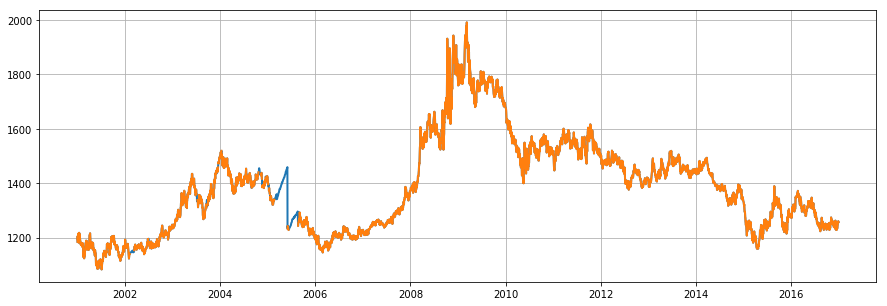

In [674]:
# EUR
plt.plot(exchange_final[['날짜']],exchange_final[['EUR']])
plt.plot(exchange[['날짜']],exchange[['EUR']])
plt.show()

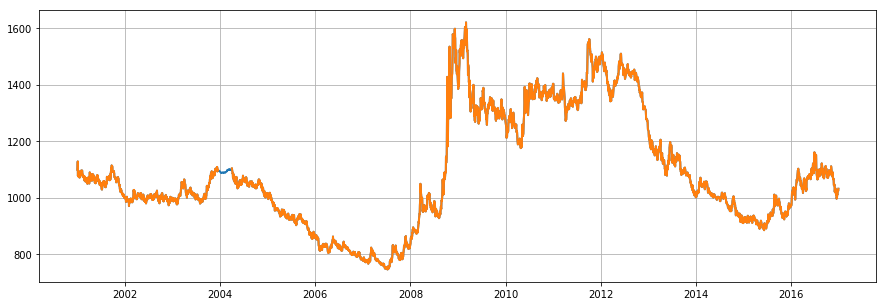

In [669]:
# JPY
plt.plot(exchange_final[['날짜']],exchange_final[['JPY']])
plt.plot(exchange[['날짜']],exchange[['JPY']])
plt.show()

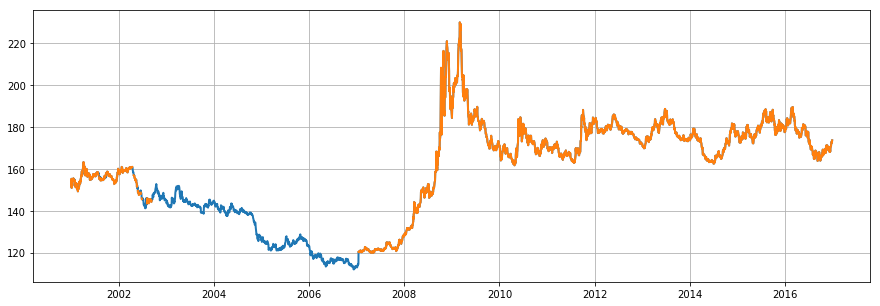

In [665]:
# CNY
plt.plot(exchange_final[['날짜']],exchange_final[['CNY']])
plt.plot(exchange[['날짜']],exchange[['CNY']])
plt.show()

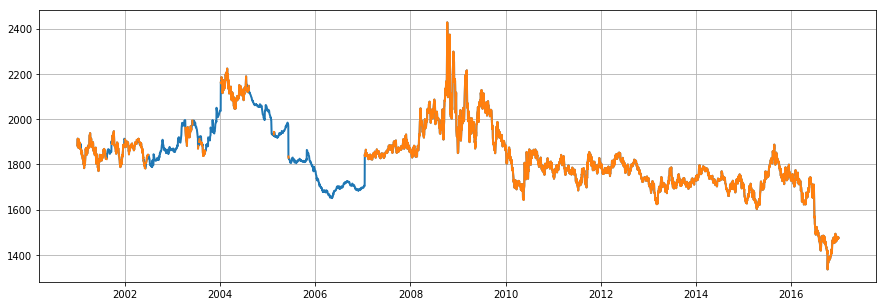

In [666]:
# GBP
plt.plot(exchange_final[['날짜']],exchange_final[['GBP']])
plt.plot(exchange[['날짜']],exchange[['GBP']])
plt.show()

## 결측치 처리한 데이터 내보내기

In [768]:
exchange_final.to_csv('exchange_train_final.csv',index=False,encoding = 'euc-kr')

## 다른 데이터셋 처리하기
### market

In [739]:
market = pd.read_csv('./market_train.csv',encoding = 'euc-kr')
market

,날짜,A등급 구리(현물),니켈(현물),알루미늄 99.7%(현물),금괴(일간),미국1년,미국3년,미국10년,국고채권(1년),국고채권(3년),국고채권(10년),Dram Exchange 지수,브랜트유 가격,원유 WTI
0,2001-01-02,1746.3,6935.0,1552.5,270.6,5.2,4.8,4.9,6.7,6.7,7.2,NaN,24.3,27.2
1,2001-01-03,1716.8,6370.0,1515.5,267.5,5.1,4.9,5.2,6.6,6.6,7.2,NaN,25.0,28.0
2,2001-01-04,1750.5,6569.0,1519.0,267.7,4.9,4.8,5.0,6.4,6.4,6.9,NaN,25.4,28.1
3,2001-01-05,1740.3,6607.0,1527.5,268.2,4.6,4.6,4.9,6.2,6.2,6.7,NaN,25.2,28.0
4,2001-01-08,1775.0,6734.0,1578.0,268.3,4.6,4.6,4.9,6.1,6.1,6.6,NaN,24.4,27.3
5,2001-01-09,1783.3,6796.0,1572.3,267.4,4.7,4.7,5.0,6.1,6.1,6.7,NaN,24.6,27.6
6,2001-01-10,1779.8,6947.0,1591.0,266.3,4.9,4.8,5.1,6.1,6.1,6.7,NaN,25.3,29.5
7,2001-01-11,1795.0,7140.0,1597.5,263.9,4.9,4.8,5.1,6.0,6.0,6.6,NaN,25.6,29.4
8,2001-01-12,1807.5,7325.0,1632.5,264.3,5.0,4.9,5.2,6.0,6.0,6.6,NaN,25.8,30.1
9,2001-01-15,1800.8,7145.0,1626.0,263.6,NaN,NaN,5.2,6.0,6.0,6.6,NaN,26.2,NaN


In [740]:
market.isnull().sum()

날짜                    0
A등급 구리(현물)          133
니켈(현물)              133
알루미늄 99.7%(현물)      132
금괴(일간)               31
미국1년                156
미국3년                136
미국10년                67
국고채권(1년)            196
국고채권(3년)            196
국고채권(10년)           196
Dram Exchange 지수    313
브랜트유 가격              71
원유 WTI              150
dtype: int64

> 결측값이 다수 존재하며 결측치가 NaN형태임을 알 수 있다

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016D9EEAC828>,
      dtype=object)

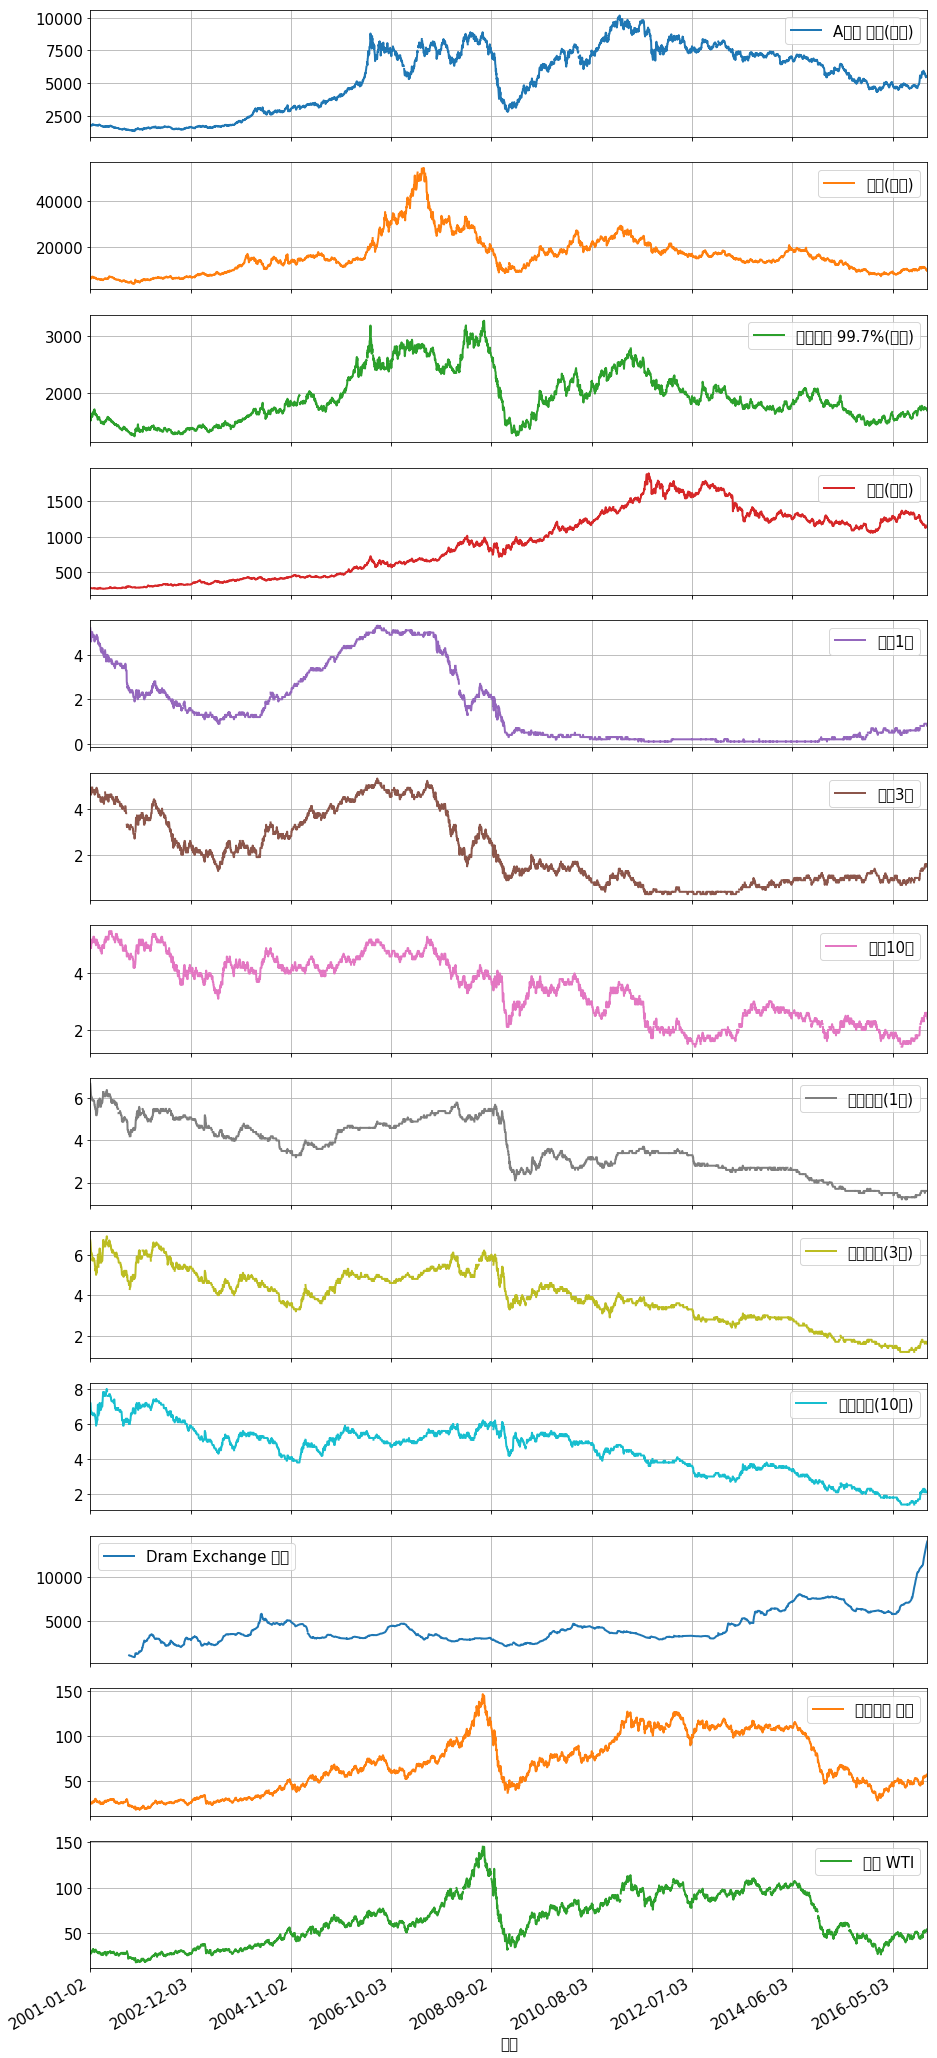

In [741]:
import matplotlib.pylab as plb
plb.rcParams["figure.figsize"] = (15,40)
plb.rcParams['lines.linewidth'] = 2
plb.rcParams['lines.color'] = 'r'
plb.rcParams['axes.grid'] = True 

market.plot(subplots = True, x = '날짜')

> 전체적인 형태를 살펴본 결과, 특별한 이상치는 확인되지 않았고 결측치 처리가 필요함을 알 수 있다.

#### 요주의 변수: Dram Exchange 지수

- 2001년 ~ 2002년 사이의 일정 구간 데이터가 존재하지 않음 -> fill_na_VAR을 사용할 수 없음 -> Dram Exchange를 제외한 채 VAR을 돌린다

### VAR 모듈로 자동 결측치 처리 (Dram Exchange 지수 제외)

In [742]:
market_noDram = market.drop('Dram Exchange 지수', axis = 1)

In [782]:
# 결측치가 없는 데이터로 var 결과 확인하기

market_noDram_var = market_noDram.dropna()
market_noDram_var = np.asarray(market_noDram_var.drop('날짜',axis = 1))

# VAR 분석
mvar = sm.tsa.VAR(market_noDram_var)
resvar = mvar.fit()
print(resvar.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 03, Nov, 2019
Time:                     14:49:11
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                   -1.82707
Nobs:                     3742.00    HQIC:                  -1.99434
Log likelihood:          -59655.8    FPE:                   0.124098
AIC:                     -2.08668    Det(Omega_mle):        0.119040
--------------------------------------------------------------------
Results for equation y1
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const         18.620385        28.826848            0.646           0.518
L1.y1          0.990642         0.003917          252.898           0.000
L1.y2          0.000957         0.000467            2.049           0.040
L1.y3         -0.

In [743]:
market_noDram_final = fill_na_VAR(market_noDram)

In [744]:
market_noDram_final

,날짜,A등급 구리(현물),니켈(현물),알루미늄 99.7%(현물),금괴(일간),미국1년,미국3년,미국10년,국고채권(1년),국고채권(3년),국고채권(10년),브랜트유 가격,원유 WTI
0,2001-01-02,1746.30,6935.00,1552.50,270.6,5.20,4.80,4.90,6.70,6.70,7.20,24.30,27.20
1,2001-01-03,1716.80,6370.00,1515.50,267.5,5.10,4.90,5.20,6.60,6.60,7.20,25.00,28.00
2,2001-01-04,1750.50,6569.00,1519.00,267.7,4.90,4.80,5.00,6.40,6.40,6.90,25.40,28.10
3,2001-01-05,1740.30,6607.00,1527.50,268.2,4.60,4.60,4.90,6.20,6.20,6.70,25.20,28.00
4,2001-01-08,1775.00,6734.00,1578.00,268.3,4.60,4.60,4.90,6.10,6.10,6.60,24.40,27.30
5,2001-01-09,1783.30,6796.00,1572.30,267.4,4.70,4.70,5.00,6.10,6.10,6.70,24.60,27.60
6,2001-01-10,1779.80,6947.00,1591.00,266.3,4.90,4.80,5.10,6.10,6.10,6.70,25.30,29.50
7,2001-01-11,1795.00,7140.00,1597.50,263.9,4.90,4.80,5.10,6.00,6.00,6.60,25.60,29.40
8,2001-01-12,1807.50,7325.00,1632.50,264.3,5.00,4.90,5.20,6.00,6.00,6.60,25.80,30.10
9,2001-01-15,1800.80,7145.00,1626.00,263.6,5.18,5.05,5.20,6.00,6.00,6.60,26.20,30.36


In [753]:
kospi_date['날짜'] = pd.to_datetime(kospi_date['날짜'], format="%Y/%m/%d")
#kospi_date

C:\Users\genie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [755]:
market_noDram_final = market_noDram_final.merge(kospi_date,how = 'inner',on = '날짜')
market_noDram_final

,날짜,A등급 구리(현물),니켈(현물),알루미늄 99.7%(현물),금괴(일간),미국1년,미국3년,미국10년,국고채권(1년),국고채권(3년),국고채권(10년),브랜트유 가격,원유 WTI
0,2001-01-02,1746.30,6935.00,1552.50,270.6,5.20,4.80,4.90,6.7,6.7,7.2,24.30,27.20
1,2001-01-03,1716.80,6370.00,1515.50,267.5,5.10,4.90,5.20,6.6,6.6,7.2,25.00,28.00
2,2001-01-04,1750.50,6569.00,1519.00,267.7,4.90,4.80,5.00,6.4,6.4,6.9,25.40,28.10
3,2001-01-05,1740.30,6607.00,1527.50,268.2,4.60,4.60,4.90,6.2,6.2,6.7,25.20,28.00
4,2001-01-08,1775.00,6734.00,1578.00,268.3,4.60,4.60,4.90,6.1,6.1,6.6,24.40,27.30
5,2001-01-09,1783.30,6796.00,1572.30,267.4,4.70,4.70,5.00,6.1,6.1,6.7,24.60,27.60
6,2001-01-10,1779.80,6947.00,1591.00,266.3,4.90,4.80,5.10,6.1,6.1,6.7,25.30,29.50
7,2001-01-11,1795.00,7140.00,1597.50,263.9,4.90,4.80,5.10,6.0,6.0,6.6,25.60,29.40
8,2001-01-12,1807.50,7325.00,1632.50,264.3,5.00,4.90,5.20,6.0,6.0,6.6,25.80,30.10
9,2001-01-15,1800.80,7145.00,1626.00,263.6,5.18,5.05,5.20,6.0,6.0,6.6,26.20,30.36


In [756]:
market_noDram_final.isnull().sum()

날짜                0
A등급 구리(현물)        0
니켈(현물)            0
알루미늄 99.7%(현물)    0
금괴(일간)            0
미국1년              0
미국3년              0
미국10년             0
국고채권(1년)          0
국고채권(3년)          0
국고채권(10년)         0
브랜트유 가격           0
원유 WTI            0
dtype: int64

#### Dram 지수 확인

In [757]:
dram = market[['날짜','Dram Exchange 지수']]

In [780]:
dram.iloc[150:200,:]

,날짜,Dram Exchange 지수
150,2001-07-31,NaN
151,2001-08-01,NaN
152,2001-08-02,NaN
153,2001-08-03,NaN
154,2001-08-06,NaN
155,2001-08-07,NaN
156,2001-08-08,NaN
157,2001-08-09,NaN
158,2001-08-10,NaN
159,2001-08-13,NaN


> 2001-10-01부터 등장하는 Dram Exchange 지수 -> 모든 칼럼을 2001-10-01부터 시작하는 사본을 만든 후 결측치 처리 -> 이후 결과보기 